In [1]:
import os, sys
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
os.chdir(ROOT_DIR)
sys.path.append(ROOT_DIR)

In [2]:
# importing scripts in scripts folder
from scripts import config as src
# importing default libraries
import numpy as np
import pandas as pd
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# TINY_SIZE=8
# SMALL_SIZE = 12
# MEDIUM_SIZE = 16
# BIGGER_SIZE = 20

import random
import pyreadr
from sklearn.preprocessing import StandardScaler

**** scripts/config.py IMPORTED!!!
**** PROJECT FOLDER ,  /home/pgundogdu/projects/signalization_prior_knowledge_based_nn


In [3]:
loc_output = './reports/figures/dataset_analysis'
src.define_folder(os.path.join(loc_output))

FOLDER information,  ./reports/figures/dataset_analysis/


'./reports/figures/dataset_analysis/'

In [4]:
## MELANOMA EXPERIMENT
df_melanoma_reference = pd.read_pickle('./data/external/exper_melanoma/reference.pck')
df_melanoma_query = pd.read_pickle('./data/external/exper_melanoma/query.pck')
df_melanoma_reference.columns = df_melanoma_reference.columns.str.lower()
df_melanoma_query.columns = df_melanoma_query.columns.str.lower()

## MOUSE EXPERIMENT 
df_mouse_learning = pd.read_pickle('./data/external/exper_mouse/1-3_integrated_NNtraining.pck')
df_mouse_retrieval = pd.read_pickle('./data/external/exper_mouse/3-33_integrated_retrieval_set.pck')
df_mouse_learning.columns = df_mouse_learning.columns.str.lower()
df_mouse_retrieval.columns = df_mouse_retrieval.columns.str.lower()

## PBMC EXPERIMENT
df_pbmc = pd.read_pickle('./data/external/exper_pbmc/Immune.pck')
df_pbmc.columns = df_pbmc.columns.str.lower()

## IMMUNE EXPERIMENT
df_immune = pd.read_pickle('./data/external/exper_immune/Fig3g.pck')
#pyreadr.read_r('./data/external/exper_immune/Fig3g.data.rds.gz')[None]
# df_immune = df_immune.iloc[: , :-2]
df_immune.columns = df_immune.columns.str.lower()

df_mouse_learning = src.dataframe_modification(df_mouse_learning, 0)
df_mouse_retrieval = src.dataframe_modification(df_mouse_retrieval, 0)


****** RAW DATASET ******
experiment dataset shape     , (402, 9438)

Sample label        pycrl gpr180 gpr182       gpr183 neurl2 neurl4  \
S1      BMDC  59.88926581    0.0    0.0  0.190303945    0.0    0.0   
S2      BMDC          0.0    0.0    0.0   0.04988755    0.0    0.0   
S3      BMDC  62.44607307    0.0    0.0  0.140584482    0.0    0.0   

Sample       mfhas1        vps53        vps52  ... klc3 avpr1b lcn6 cchcr1  \
S1        22.928124  37.38295246  2.299521764  ...    0      0    0      0   
S2              0.0  9.073019116          0.0  ...    0      0    0      0   
S3      6.438339344  0.192870387          0.0  ...    0      0    0      0   

Sample      lcn2    rps21 gpx2 bcr scrt1 adck4  
S1       63.8601  136.315    0   0     0     0  
S2       874.017  5.63192    0   0     0     0  
S3      0.537095  34.0609    0   0     0     0  

[3 rows x 9438 columns]
******* DATASET INFO *******
<class 'pandas.core.frame.DataFrame'>
Index: 402 entries, S1 to GSM1112529
Columns: 9

In [5]:
print(df_melanoma_reference.shape)
print(df_melanoma_query.shape)
print(df_mouse_learning.shape)
print(df_mouse_retrieval.shape)
print(df_pbmc.shape)
print(df_immune.shape)

(2761, 17995)
(3412, 17995)
(402, 9438)
(17293, 9438)
(17500, 15701)
(9703, 16901)


In [7]:
gene_melanoma = set(df_melanoma_reference.columns).intersection(set(df_melanoma_query.columns))
gene_mouse = set(df_mouse_retrieval.columns).intersection(set(df_mouse_learning.columns))
gene_immune_pbmc = set(df_immune.columns).intersection(set(df_pbmc.columns))
k_ =50
# common_genes = set(df_bio['symbol']).intersection(gene_immune_pbmc.intersection(gene_melanoma.intersection(gene_mouse)))
common_genes = gene_immune_pbmc.intersection(gene_melanoma.intersection(gene_mouse))

random.seed(91)
random_genes = list(random.sample(list(common_genes), k=k_))
print(len(set(random_genes)))

50


## MELANOMA EXPERIMENT

### Reference Dataset

In [8]:
exper = 'Melanoma'
exper_dataset = 'reference'
exper_no = '1'

EXPORTED!!,  ./reports/figures/dataset_analysis/1.1_exper_Melanoma_reference_TPM.png
EXPORTED!!,  ./reports/figures/dataset_analysis/1.2_exper_Melanoma_reference_TPM_log1p.png


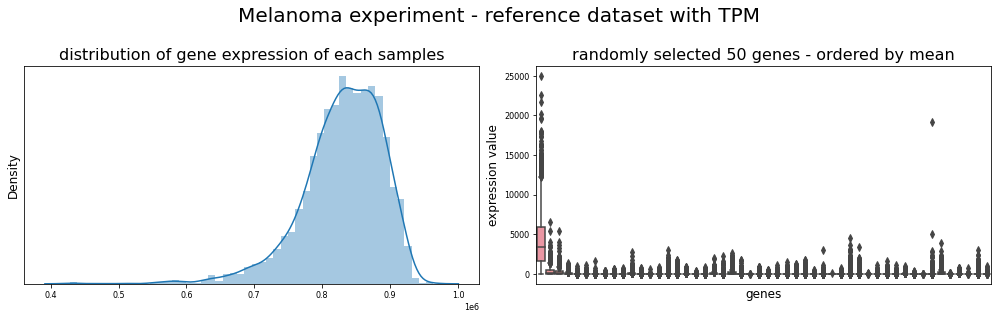

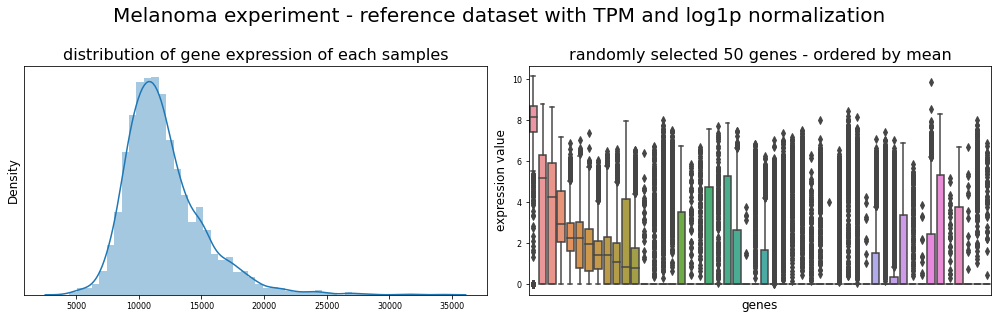

In [9]:
# ORIGINAL DATASET
df_raw = df_melanoma_reference
src.plot_expression_and_sum(df=df_raw
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM'
                        , random_genes=random_genes
                        , png = exper_no+'.1_exper_'+exper+'_'+exper_dataset+'_TPM.png'
                        , output=loc_output)

# ORIGINAL DATASET with LOG NORMALIZATION
df_log1p = np.log1p(df_raw.iloc[:, :-1])
src.plot_expression_and_sum(df=df_log1p
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM and log1p normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.2_exper_'+exper+'_'+exper_dataset+'_TPM_log1p.png'
                        , output=loc_output)

del(df_raw)
del(df_log1p)
del(exper)
del(exper_dataset)
del(exper_no)

### Query Dataset

In [10]:
exper = 'Melanoma'
exper_dataset = 'query'
exper_no = '2'

EXPORTED!!,  ./reports/figures/dataset_analysis/2.1_exper_Melanoma_query_TPM.png
EXPORTED!!,  ./reports/figures/dataset_analysis/2.2_exper_Melanoma_query_TPM_log1p.png


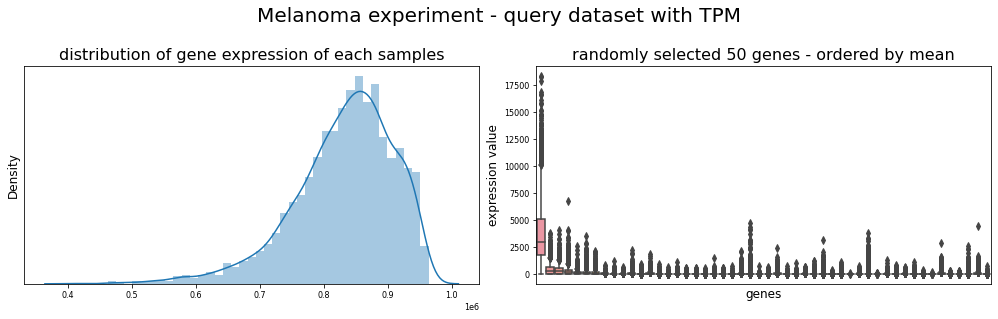

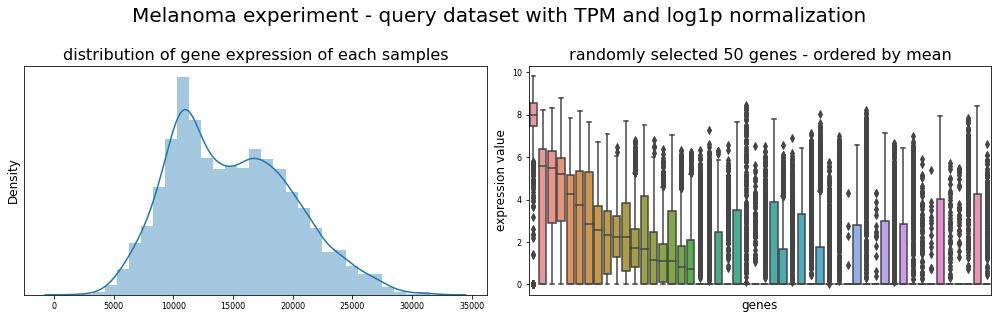

In [11]:
# ORIGINAL DATASET
df_raw = df_melanoma_query
src.plot_expression_and_sum(df=df_raw
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM'
                        , random_genes=random_genes
                        , png = exper_no+'.1_exper_'+exper+'_'+exper_dataset+'_TPM.png'
                        , output=loc_output)

# ORIGINAL DATASET with LOG NORMALIZATION
df_log1p = np.log1p(df_raw.iloc[:, :-1])
src.plot_expression_and_sum(df=df_log1p
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM and log1p normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.2_exper_'+exper+'_'+exper_dataset+'_TPM_log1p.png'
                        , output=loc_output)

del(df_raw)
del(df_log1p)
del(exper)
del(exper_dataset)
del(exper_no)

## MOUSE EXPERIMENT

### Training Dataset

In [12]:
exper = 'Mouse'
exper_dataset = 'learning'
exper_no = '3'

EXPORTED!!,  ./reports/figures/dataset_analysis/3.1_exper_Mouse_learning_TPM.png
EXPORTED!!,  ./reports/figures/dataset_analysis/3.2_exper_Mouse_learning_TPM_sw_gw.png


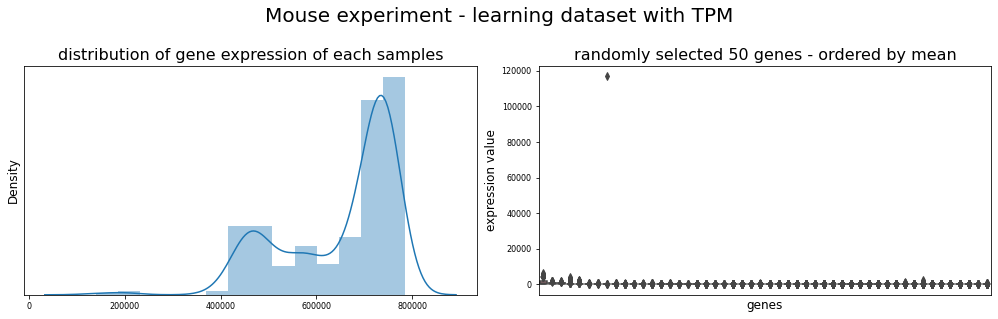

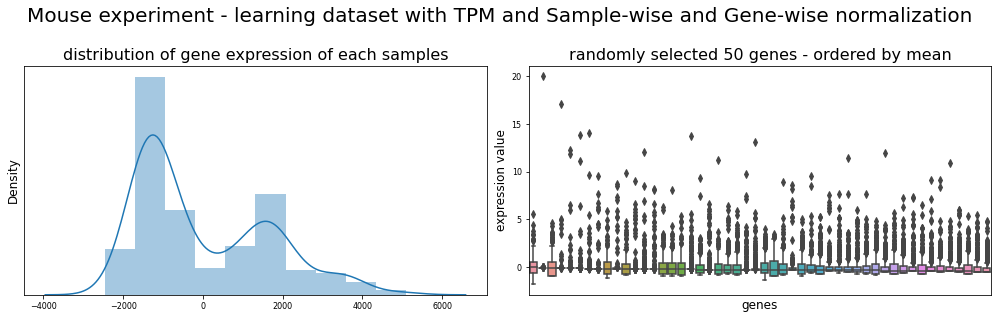

In [13]:
# ORIGINAL DATASET
df_raw = df_mouse_learning
df_raw = df_raw.rename_axis(None, axis = 1)
src.plot_expression_and_sum(df=df_raw
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM'
                        , random_genes=random_genes
                        , png = exper_no+'.1_exper_'+exper+'_'+exper_dataset+'_TPM.png'
                        , output=loc_output)

## ORIGINAL DATASET with SAMPLE-WISE and GENE-WISE NORMALIZATION
# SAMPLE-WISE NORMALIZE
sum_ = np.sum(df_raw, axis=1)
sum_.values[sum_.values == 0.0] = 1e-10
df_raw_sw =  df_raw.iloc[:, :-1].div(sum_, axis=0)*1e6
# GENE-WISE NORMALIZE
mean_ = np.mean(df_raw_sw, axis=0)
std_ = np.std(df_raw_sw, axis=0)
std_.values[std_.values == 0.0] = 1e-10
df_raw_sw_gw = (df_raw_sw - mean_).div(std_)

src.plot_expression_and_sum(df=df_raw_sw_gw
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM and Sample-wise and Gene-wise normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.2_exper_'+exper+'_'+exper_dataset+'_TPM_sw_gw.png'
                        , output=loc_output)

del(df_raw)
del(df_raw_sw)
del(df_raw_sw_gw)
del(exper)
del(exper_dataset)
del(exper_no)
del(sum_, mean_, std_)

### Retrieval Dataset

In [14]:
exper = 'Mouse'
exper_dataset = 'retrieval'
exper_no = '4'

EXPORTED!!,  ./reports/figures/dataset_analysis/4.1_exper_Mouse_retrieval_TPM.png
EXPORTED!!,  ./reports/figures/dataset_analysis/4.2_exper_Mouse_retrieval_TPM_sw_gw.png


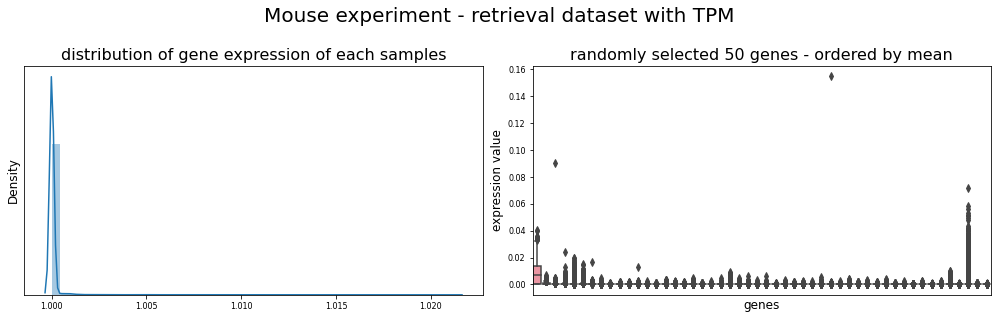

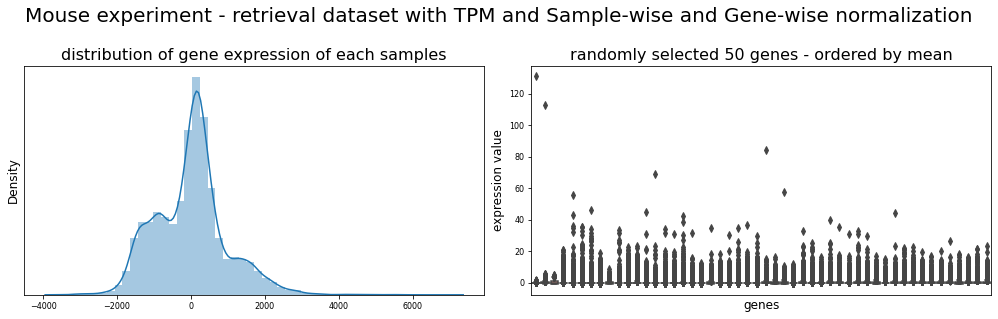

In [15]:
# ORIGINAL DATASET
df_raw = df_mouse_retrieval
df_raw.reset_index(drop=True, inplace=True)
df_raw = df_raw.rename_axis(None, axis = 1)
src.plot_expression_and_sum(df=df_raw
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM'
                        , random_genes=random_genes
                        , png = exper_no+'.1_exper_'+exper+'_'+exper_dataset+'_TPM.png'
                        , output=loc_output)

## ORIGINAL DATASET with SAMPLE-WISE and GENE-WISE NORMALIZATION
# SAMPLE-WISE NORMALIZE
sum_ = np.sum(df_raw, axis=1)
sum_.values[sum_.values == 0.0] = 1e-10
df_raw_sw =  df_raw.iloc[:, :-1].div(sum_, axis=0)*1e6
# GENE-WISE NORMALIZE
mean_ = np.mean(df_raw_sw, axis=0)
std_ = np.std(df_raw_sw, axis=0)
std_.values[std_.values == 0.0] = 1e-10
df_raw_sw_gw = (df_raw_sw - mean_).div(std_)

src.plot_expression_and_sum(df=df_raw_sw_gw
                        , title=exper+' experiment - '+exper_dataset+' dataset with TPM and Sample-wise and Gene-wise normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.2_exper_'+exper+'_'+exper_dataset+'_TPM_sw_gw.png'
                        , output=loc_output)


del(df_raw)
del(df_raw_sw)
del(df_raw_sw_gw)
del(exper)
del(exper_dataset)
del(exper_no)
del(sum_, mean_, std_)

## PBMC EXPERIMENT

In [16]:
exper = 'pbmc'
exper_dataset = ''
exper_no = '5'

EXPORTED!!,  ./reports/figures/dataset_analysis/5.1_exper_pbmc_.png
EXPORTED!!,  ./reports/figures/dataset_analysis/5.2_exper_pbmc__sw_log1p.png


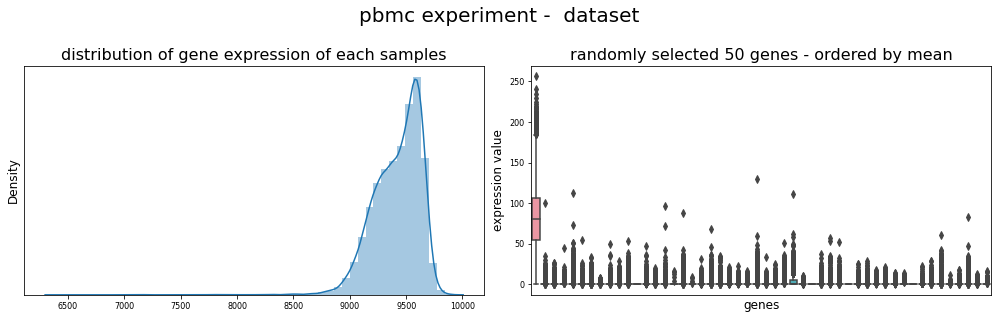

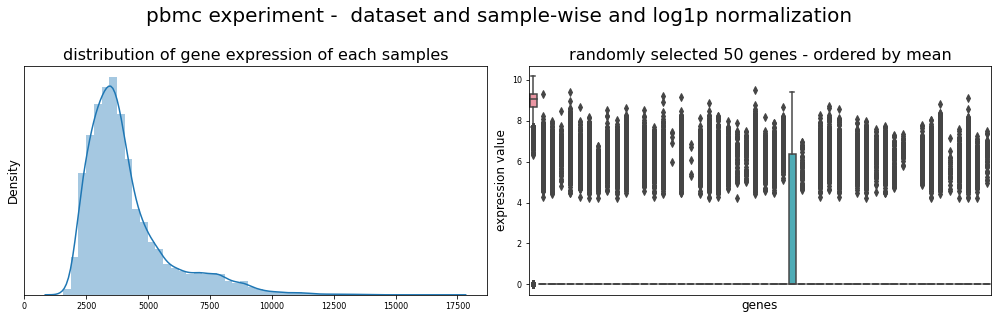

In [17]:
# ORIGINAL DATASET
df_raw = df_pbmc
df_raw = pd.concat([df_raw.iloc[:, :-1].astype('float'), df_raw.iloc[:, -1]], axis=1)
df_raw.reset_index(drop=True, inplace=True)
df_raw = df_raw.rename_axis(None, axis = 1)
src.plot_expression_and_sum(df=df_raw
                        , title=exper+' experiment - '+exper_dataset+' dataset'
                        , random_genes=random_genes
                        , png = exper_no+'.1_exper_'+exper+'_'+exper_dataset+'.png'
                        , output=loc_output)

# ORIGINAL DATASET with SAMPLE-WISE NORMALIZATION
df_sw = pd.concat([df_raw.iloc[:, :-1].div(df_raw.iloc[:, :-1].sum(axis=1), axis=0)*1e6
                   , df_raw.iloc[:, -1]], axis=1)
# ORIGINAL DATASET with SAMPLE-WISE and LOG NORMALIZATION
df_sw_log1p = np.log1p(df_sw.iloc[:, :-1])
src.plot_expression_and_sum(df=df_sw_log1p
                        , title=exper+' experiment - '+exper_dataset+' dataset and sample-wise and log1p normalization'
                        , random_genes=random_genes
                        , png = exper_no+'.2_exper_'+exper+'_'+exper_dataset+'_sw_log1p.png'
                        , output=loc_output)

del(df_raw)
del(df_sw)
del(df_sw_log1p)
del(exper)
del(exper_dataset)
del(exper_no)

## IMMUNE EXPERIMENT

In [18]:
exper = 'immune'
exper_dataset = ''
exper_no = '6'

EXPORTED!!,  ./reports/figures/dataset_analysis/6.1_exper_immune_.png


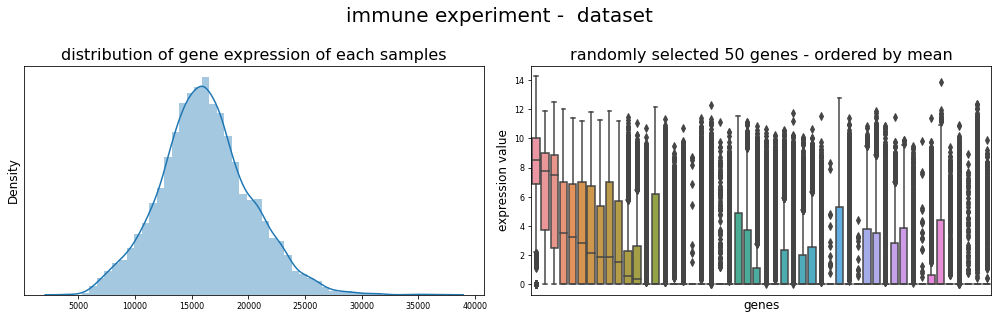

In [19]:
# ORIGINAL DATASET
df_raw = df_immune
src.plot_expression_and_sum(df=df_raw
                        , title=exper+' experiment - '+exper_dataset+' dataset'
                        , random_genes=random_genes
                        , png = exper_no+'.1_exper_'+exper+'_'+exper_dataset+'.png'
                        , output=loc_output)


del(df_raw)
del(exper)
del(exper_dataset)
del(exper_no)